In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime,date
import scipy.stats as stats
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [2]:
xls = pd.ExcelFile('/Users/akashbhoite/Datasets/KPMG.xlsx')
df1 = pd.read_excel(xls, 'Transactions')
df2 = pd.read_excel(xls, 'CustomerDemographic')
df3 = pd.read_excel(xls, 'NewCustomerList')
df4 = pd.read_excel(xls, 'CustomerAddress')

In [179]:
df1.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [178]:
df2.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'Age'],
      dtype='object')

## Data Quality Check


## Transactions Data


In [3]:
df1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
df1.shape

(20000, 13)

In [5]:
df1['product_first_sold_date'] = pd.to_datetime(df1['product_first_sold_date'])

In [6]:
df1 = df1[df1.product_id != 0]

In [7]:
df1.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               334
order_status                 0
brand                        0
product_line                 0
product_class                0
product_size                 0
list_price                   0
standard_cost                0
product_first_sold_date      0
dtype: int64

In [8]:
order_mode = df1['online_order'].mode()[0]
df1.online_order.fillna(order_mode,inplace=True)

## Number of products

In [9]:
df1['product_id'].nunique()

100

## Customer Data

In [10]:
df2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [11]:
df2.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [12]:
df2.drop(columns='default',inplace=True)

In [13]:
def calculate_age(dtob):
    today = date.today()
    return today.year - dtob.year - ((today.month, today.day) < (dtob.month, dtob.day))

In [14]:
df2['Age'] = df2['DOB'].apply(calculate_age)

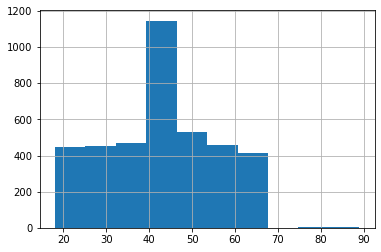

In [180]:
df2['Age'].hist()

In [16]:
#Since this customer's DOB is 1835 which makes him 175 years old
df2 = df2[df2.customer_id != 34]

In [17]:
df2['Age'].mean()

42.941717791411044

In [18]:
df2['Age'].fillna(df2['Age'].mean(),inplace=True)

In [19]:
df2.drop(columns='DOB',inplace=True)

In [20]:
df2['gender'].value_counts()

Female    2037
Male      1872
U           87
F            1
M            1
Femal        1
Name: gender, dtype: int64

In [21]:
df2['gender'] = df2['gender'].replace(['Femal', 'F'], 'Female')
df2['gender'] = df2['gender'].replace('M', 'Male')

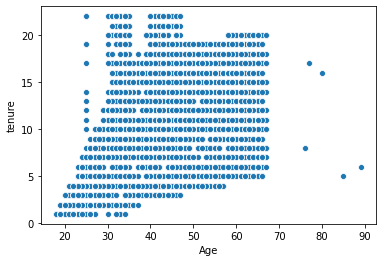

In [22]:
x=df2['Age']
y=df2['tenure']
sns.scatterplot(x,y)

In [23]:
df2['Age'].corr(df2['tenure'])
#Mass Customers missing industry = 318 | Manufacturing, Financial Services
#High Net Worth missing industry = 170 | Financial Services, Manufacturing
#Affluent customers missing industry = 168 | Manufacturing, Financial Services

0.428440230590045

In [24]:
mask = df2[df2['job_industry_category'].isnull()]

for i in range(0,len(mask)):
    if mask['wealth_segment'].iloc[i] == 'High Net Worth':
        mask['job_industry_category'].iloc[i]= "Financial Services"
    else:
        mask['job_industry_category'].iloc[i]= "Manufacturing"
    

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-24-445e8d9c5e60>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask['job_industry_category'].iloc[i]= "Manufacturing"
<ipython-input-24-445e8d9c5e60>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask['job_industry_category'].iloc[i]= "Financial Services"


In [25]:
df2['job_industry_category'].fillna(mask['job_industry_category'],inplace=True)
df2.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
job_title                              506
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
Age                                      0
dtype: int64

In [26]:
# Manufacturing missing title = 173| Chemical Engineer
# Financial Services =  118 | Senior Financial Analyst
# Health =  53 | Social Worker
# Retail =  53 | Sales Representative  
#Property = 36 | Account Coordinator

In [27]:
mask_1 = df2[df2['job_title'].isnull()]

for i in range(0,len(mask_1)):
    if mask_1['job_industry_category'].iloc[i] == 'Manufacturing':
        mask_1['job_title'].iloc[i]= "Chemical Engineer"
    elif mask_1['job_industry_category'].iloc[i] == 'Financial Services':
        mask_1['job_title'].iloc[i]= "Senior Financial Analysr"
    elif mask_1['job_industry_category'].iloc[i] == 'Health':
        mask_1['job_title'].iloc[i]= "Social Worker"
    elif mask_1['job_industry_category'].iloc[i] == 'Retail':
        mask_1['job_title'].iloc[i]= "Sales Representative"
    elif mask_1['job_industry_category'].iloc[i] == 'Property':
        mask_1['job_title'].iloc[i]= "Account Coordinator"

<ipython-input-27-7cefeb8bdc92>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask_1['job_title'].iloc[i]= "Sales Representative"
<ipython-input-27-7cefeb8bdc92>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask_1['job_title'].iloc[i]= "Senior Financial Analysr"
<ipython-input-27-7cefeb8bdc92>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask_1['job_title'].iloc[i]= "Account Coordinator"
<ipython-input-27-7cefeb8bdc92>:5: 

In [28]:
mask_1.isnull().sum()

customer_id                             0
first_name                              0
last_name                              16
gender                                  0
past_3_years_bike_related_purchases     0
job_title                              73
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                  9
Age                                     0
dtype: int64

In [29]:
df2['job_title'].fillna(mask_1['job_title'],inplace=True)

In [30]:
df2['tenure'].fillna(df2['tenure'].mean(),inplace=True)

## Cleaned DF2

In [31]:
df2.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
job_title                               73
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
Age                                      0
dtype: int64

In [32]:
df2 = df2[df2['job_title'].notna()]

## DF4 

In [33]:
df4.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [34]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [35]:
df4.country.value_counts()

Australia    3999
Name: country, dtype: int64

In [36]:
df4['state'] = df4['state'].replace('New South Wales', 'NSW')
df4['state'] = df4['state'].replace('Victoria', 'VIC')

## Merge Df1, Df2, Df4

In [37]:
df_main = pd.merge(pd.merge(df1,df2,on='customer_id'),df4,on='customer_id')

In [38]:
df_main.isnull().sum()

transaction_id                           0
product_id                               0
customer_id                              0
transaction_date                         0
online_order                             0
order_status                             0
brand                                    0
product_line                             0
product_class                            0
product_size                             0
list_price                               0
standard_cost                            0
product_first_sold_date                  0
first_name                               0
last_name                              592
gender                                   0
past_3_years_bike_related_purchases      0
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
Age        

In [39]:
cols = ['first_name','last_name','address']
df_main.drop(cols,axis=1,inplace=True)

## Customer Segmentation

## Revenue = Active Customer Count * Order Count * Average Revenue per Order

In [40]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18288 entries, 0 to 18287
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       18288 non-null  int64         
 1   product_id                           18288 non-null  int64         
 2   customer_id                          18288 non-null  int64         
 3   transaction_date                     18288 non-null  datetime64[ns]
 4   online_order                         18288 non-null  float64       
 5   order_status                         18288 non-null  object        
 6   brand                                18288 non-null  object        
 7   product_line                         18288 non-null  object        
 8   product_class                        18288 non-null  object        
 9   product_size                         18288 non-null  object        
 10  list_price

In [41]:
#converting the type of Invoice Date Field from string to datetime.
df_main['transaction_date'] = pd.to_datetime(df_main['transaction_date'])

#creating YearMonth field for the ease of reporting and visualization
df_main['transaction_year_month'] = df_main['transaction_date'].map(lambda date: 100*date.year + date.month)

In [42]:
df_main['transaction_year_month'].value_counts()

201710    1613
201708    1609
201707    1571
201701    1549
201705    1533
201711    1524
201704    1520
201712    1509
201703    1502
201702    1492
201706    1443
201709    1423
Name: transaction_year_month, dtype: int64

In [43]:
#calculate Revenue for each row and create a new dataframe with YearMonth - Revenue columns
df_main['Revenue'] = df_main['list_price']
df_revenue = df_main.groupby(['transaction_year_month'])['Revenue'].sum().reset_index()
df_revenue

,transaction_year_month,Revenue
0,201701,1797619.46
1,201702,1724462.90
2,201703,1718317.28
3,201704,1761256.43
4,201705,1823700.21
5,201706,1679725.24
6,201707,1807258.34
7,201708,1859314.67
8,201709,1658188.81
9,201710,1874099.54


In [44]:
df_main.sort_values(by='transaction_date',inplace=True)

In [45]:
df_check = df_main[['list_price','Revenue','transaction_date','transaction_year_month']].reset_index()

In [46]:
df_jan = df_check[df_check['transaction_year_month'] == 201701]

In [47]:
df_jan['transaction_date'].value_counts()

2017-01-31    66
2017-01-15    64
2017-01-18    60
2017-01-05    60
2017-01-25    59
2017-01-19    58
2017-01-10    57
2017-01-09    57
2017-01-04    55
2017-01-20    53
2017-01-21    52
2017-01-03    51
2017-01-06    51
2017-01-01    51
2017-01-17    50
2017-01-07    49
2017-01-08    48
2017-01-11    48
2017-01-26    48
2017-01-30    47
2017-01-23    46
2017-01-02    45
2017-01-22    45
2017-01-24    45
2017-01-14    44
2017-01-16    44
2017-01-27    42
2017-01-13    41
2017-01-29    41
2017-01-28    40
2017-01-12    32
Name: transaction_date, dtype: int64

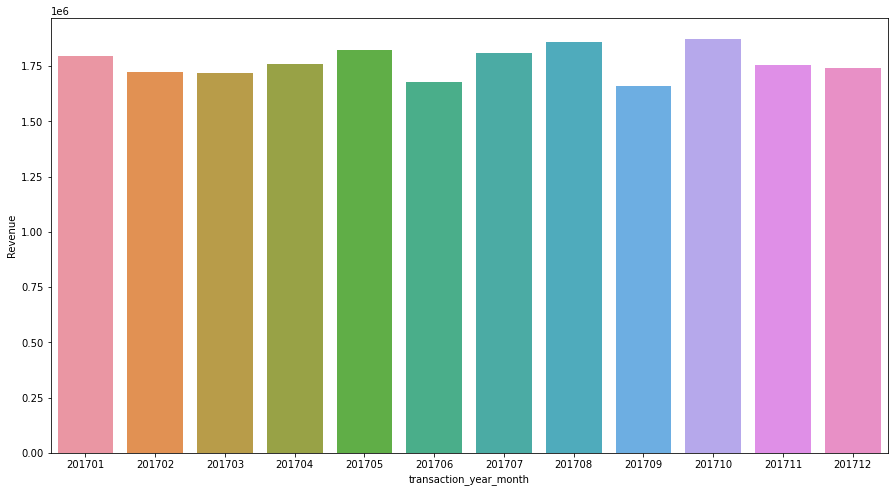

In [48]:
plt.figure(figsize=(15,8))
sns.barplot(x=df_revenue['transaction_year_month'],y=df_revenue['Revenue'])

In [49]:
df_revenue['MonthlyGrowthRate'] = df_revenue['Revenue'].pct_change()

## Monthly active customers 12581011

In [51]:
#creating monthly active customers dataframe by counting unique Customer IDs
df_monthly_active = df_main.groupby('transaction_year_month')['customer_id'].nunique().reset_index()

In [52]:
df_monthly_active.head()

,transaction_year_month,customer_id
0,201701,1258
1,201702,1196
2,201703,1209
3,201704,1216
4,201705,1210


In [53]:
df_monthly_sales = df_main.groupby('transaction_year_month')['transaction_id'].nunique().reset_index()
df_monthly_sales.head()

,transaction_year_month,transaction_id
0,201701,1549
1,201702,1492
2,201703,1502
3,201704,1520
4,201705,1533


In [54]:
df_monthly_sales.head(12)

,transaction_year_month,transaction_id
0,201701,1549
1,201702,1492
2,201703,1502
3,201704,1520
4,201705,1533
5,201706,1443
6,201707,1571
7,201708,1609
8,201709,1423
9,201710,1613


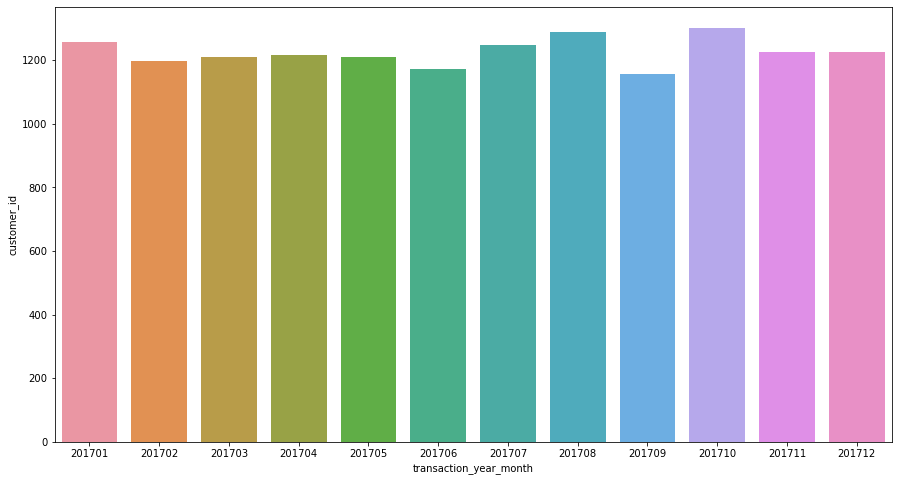

In [55]:
plt.figure(figsize=(15,8))
sns.barplot(x='transaction_year_month',y='customer_id',data=df_monthly_active)

In [56]:
df_monthly_order_avg = df_main.groupby('transaction_year_month')['Revenue'].mean().reset_index()

In [57]:
df_monthly_order_avg.head()

,transaction_year_month,Revenue
0,201701,1160.503202
1,201702,1155.806233
2,201703,1144.019494
3,201704,1158.721336
4,201705,1189.628317


In [58]:
df_min_purchase = df_main.groupby('customer_id').transaction_date.min().reset_index()
df_min_purchase.columns = ['customer_id','MinPurchaseDate']
df_min_purchase['MinPurchaseYearMonth'] = df_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)

In [182]:
df_min_purchase

,customer_id,MinPurchaseDate,MinPurchaseYearMonth
0,1,2017-01-05,201701
1,2,2017-05-04,201705
2,5,2017-03-03,201703
3,6,2017-01-28,201701
4,7,2017-02-18,201702
...,...,...,...
3414,3495,2017-01-24,201701
3415,3496,2017-03-07,201703
3416,3497,2017-09-01,201709
3417,3498,2017-02-03,201702


In [60]:
df_main = pd.merge(df_main, df_min_purchase, on='customer_id')

In [61]:
df_main.transaction_year_month

0        201701
1        201702
2        201703
3        201703
4        201704
          ...  
18283    201712
18284    201712
18285    201712
18286    201712
18287    201712
Name: transaction_year_month, Length: 18288, dtype: int64

In [62]:
df_main['UserType'] = np.where(df_main['transaction_year_month']>df_main['MinPurchaseYearMonth'],'Existing','New')

#if df_main.loc[df_main['transaction_year_month']>df_main['MinPurchaseYearMonth'],'UserType']:
#df_main.iloc[i] = 'Existing'
#else:
#df_main['UserType'] = 'New'

#calculate the Revenue per month for each user type
df_user_type_revenue = df_main.groupby(['transaction_year_month','UserType'])['Revenue'].sum().reset_index()

#filtering the dates and plot the result
#df_user_type_revenue = df_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")

In [63]:
df_main.to_excel('KPMG_clean.xlsx')

In [64]:
df_main['UserType'].value_counts()

Existing    14036
New          4252
Name: UserType, dtype: int64

In [65]:
df_user_type_revenue.head(50)

,transaction_year_month,UserType,Revenue
0,201701,New,1797619.46
1,201702,Existing,650459.63
2,201702,New,1074003.27
3,201703,Existing,1035865.22
4,201703,New,682452.06
5,201704,Existing,1282382.37
6,201704,New,478874.06
7,201705,Existing,1479703.60
8,201705,New,343996.61
9,201706,Existing,1486292.46


In [66]:
df_user_ratio = df_main.query("UserType == 'New'").groupby(['transaction_year_month'])['customer_id'].nunique()/df_main.query("UserType =='Existing'").groupby(['transaction_year_month'])['customer_id'].nunique()

In [67]:
df_user_ratio = df_user_ratio.reset_index()
df_user_ratio = df_user_ratio.dropna()

#print the dafaframe
df_user_ratio

,transaction_year_month,customer_id
1,201702,1.724374
2,201703,0.658436
3,201704,0.372460
4,201705,0.220989
5,201706,0.127885
6,201707,0.083333
7,201708,0.056511
8,201709,0.023873
9,201710,0.019577
10,201711,0.015742


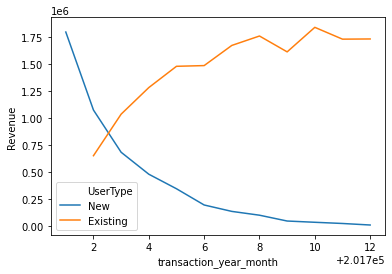

In [68]:
sns.lineplot(x="transaction_year_month", y="Revenue", hue="UserType", data=df_user_type_revenue)

In [69]:
df_user_type_revenue.head(16)

,transaction_year_month,UserType,Revenue
0,201701,New,1797619.46
1,201702,Existing,650459.63
2,201702,New,1074003.27
3,201703,Existing,1035865.22
4,201703,New,682452.06
5,201704,Existing,1282382.37
6,201704,New,478874.06
7,201705,Existing,1479703.60
8,201705,New,343996.61
9,201706,Existing,1486292.46


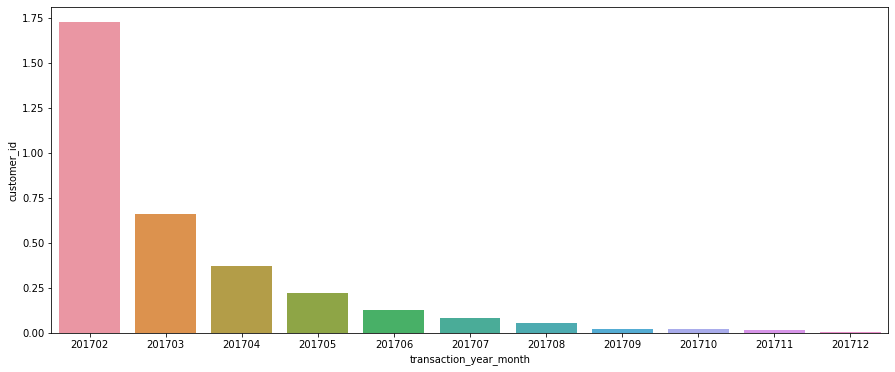

In [70]:
plt.figure(figsize=(15,6))
sns.barplot(x='transaction_year_month',y='customer_id',data=df_user_ratio)

## Customer Segmentation

### RFM stands for Recency - Frequency - Monetary Value. Theoretically we will have segments like below:
### Low Value: Customers who are less active than others, not very frequent buyer/visitor and generates very low - zero - maybe negative revenue.
### Mid Value: In the middle of everything. Often using our platform (but not as much as our High Values), fairly frequent and generates moderate revenue.
### High Value: The group we don’t want to lose. High Revenue, Frequency and low Inactivity.

### Recency

In [71]:
tx_data = df_main

In [72]:
tx_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18288 entries, 0 to 18287
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       18288 non-null  int64         
 1   product_id                           18288 non-null  int64         
 2   customer_id                          18288 non-null  int64         
 3   transaction_date                     18288 non-null  datetime64[ns]
 4   online_order                         18288 non-null  float64       
 5   order_status                         18288 non-null  object        
 6   brand                                18288 non-null  object        
 7   product_line                         18288 non-null  object        
 8   product_class                        18288 non-null  object        
 9   product_size                         18288 non-null  object        
 10  list_price

In [73]:
tx_user = pd.DataFrame(tx_data['customer_id'].unique())
tx_user.columns = ['customer_id']

#get the max purchase date for each customer and create a dataframe with it
tx_max_purchase = tx_data.groupby('customer_id').transaction_date.max().reset_index()
tx_max_purchase.columns = ['customer_id','MaxPurchaseDate']

#we take our observation point as the max invoice date in our dataset
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days

#merge this dataframe to our new user dataframe
tx_user = pd.merge(tx_user, tx_max_purchase[['customer_id','Recency']], on='customer_id')

tx_user.head()

,customer_id,Recency
0,1229,19
1,824,9
2,3335,3
3,2543,22
4,2488,18


In [196]:
(tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate'][2]).days

16

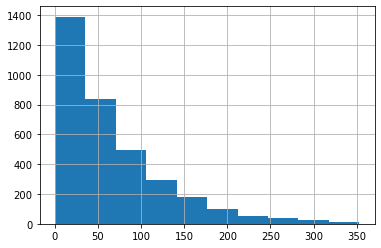

In [74]:
tx_user.Recency.hist()

In [75]:
tx_user.describe()

,customer_id,Recency
count,3419.000000,3419.000000
mean,1752.774788,65.446329
std,1009.259013,62.308217
min,1.000000,0.000000
25%,879.500000,19.000000
50%,1752.000000,46.000000
75%,2626.500000,91.000000
max,3499.000000,353.000000


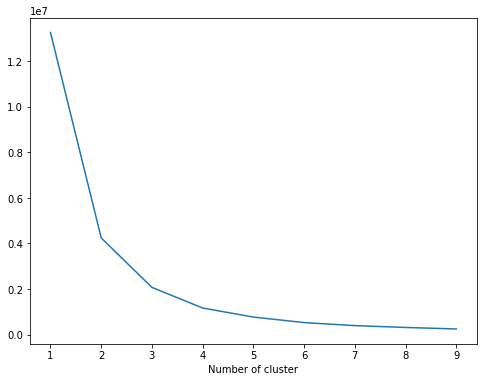

In [203]:
from sklearn.cluster import KMeans

sse={}
tx_recency = tx_user[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure(figsize=(8,6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [77]:
#build 3 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=3)
kmeans.fit(tx_user[['Recency']])
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])

In [78]:
#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [79]:
tx_user = order_cluster('RecencyCluster', 'Recency',tx_user,False)

In [80]:
tx_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,337.0,209.489614,47.685734,154.0,170.0,196.0,236.0,353.0
1,1030.0,96.873786,25.486131,62.0,75.0,91.0,115.0,153.0
2,2052.0,26.015107,17.627249,0.0,11.0,24.0,41.0,61.0


## Frequency

In [214]:
tx_frequency = tx_data.groupby(['customer_id']).transaction_date.count().reset_index()
tx_frequency.columns = ['customer_id','Frequency']

In [215]:
tx_frequency

,customer_id,Frequency
0,1,11
1,2,3
2,5,6
3,6,3
4,7,3
...,...,...
3414,3495,5
3415,3496,4
3416,3497,3
3417,3498,6


In [84]:
tx_user = pd.merge(tx_user,tx_frequency,on='customer_id')

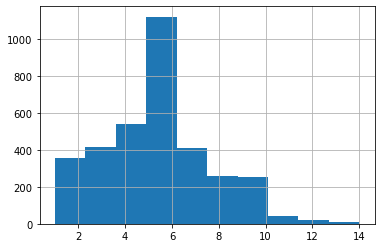

In [85]:
tx_user['Frequency'].hist()

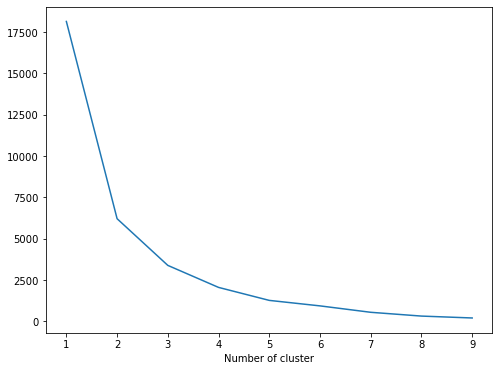

In [216]:
sse={}
tx_frequency = tx_user[['Frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_frequency)
    tx_frequency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure(figsize=(8,6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [87]:
#build 3 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=3)
kmeans.fit(tx_user[['Frequency']])
tx_user['FrequencyCluster'] = kmeans.predict(tx_user[['Frequency']])
tx_user = order_cluster('FrequencyCluster', 'Frequency',tx_user,True)

In [88]:
#see details of each cluster
tx_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,1306.0,3.080398,0.929119,1.0,2.0,3.0,4.0,4.0
1,1530.0,5.875817,0.804014,5.0,5.0,6.0,7.0,7.0
2,583.0,9.048027,1.246752,8.0,8.0,9.0,10.0,14.0


## Revenue/Monetary Value

In [89]:
tx_revenue = tx_data.groupby(['customer_id']).Revenue.sum().reset_index()

In [90]:
tx_user = pd.merge(tx_user,tx_revenue,on='customer_id')

In [91]:
len(tx_user)

3419

In [92]:
#apply clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(tx_user[['Revenue']])
tx_user['RevenueCluster'] = kmeans.predict(tx_user[['Revenue']])


#order the cluster numbers
tx_user = order_cluster('RevenueCluster', 'Revenue',tx_user,True)

#show details of the dataframe
tx_user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,1291.0,3355.254531,1163.917186,60.34,2546.060,3561.17,4315.54,5012.31
1,1477.0,6688.678937,1039.377717,5012.97,5810.690,6618.86,7545.15,8695.82
2,651.0,10733.385637,1725.083083,8697.36,9409.875,10296.12,11547.73,19071.32


In [93]:
#build 3 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=3)
kmeans.fit(tx_user[['Revenue']])
tx_user['RevenueCluster'] = kmeans.predict(tx_user[['Revenue']])
tx_user = order_cluster('RevenueCluster', 'Revenue',tx_user,True)

In [94]:
tx_user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,1291.0,3355.254531,1163.917186,60.34,2546.060,3561.17,4315.54,5012.31
1,1477.0,6688.678937,1039.377717,5012.97,5810.690,6618.86,7545.15,8695.82
2,651.0,10733.385637,1725.083083,8697.36,9409.875,10296.12,11547.73,19071.32


In [217]:
#calculate overall score and use mean() to see details
tx_user['OverallScore'] = tx_user['RecencyCluster'] + tx_user['FrequencyCluster'] + tx_user['RevenueCluster']
tx_user.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

,Recency,Frequency,Revenue
OverallScore,,,
0,217.622407,2.477178,2783.901162
1,107.937656,2.960100,3334.776259
2,59.860856,3.642202,4100.429052
3,62.790769,5.276923,5845.697246
4,33.900645,6.086452,7094.875097
5,39.760355,7.721893,9237.718077
6,23.211111,9.347222,11355.056278


In [100]:
tx_user['Segment'] = 'Low-Value'
tx_user.loc[tx_user['OverallScore']>2,'Segment'] = 'Mid-Value' 
tx_user.loc[tx_user['OverallScore']>4,'Segment'] = 'High-Value' 

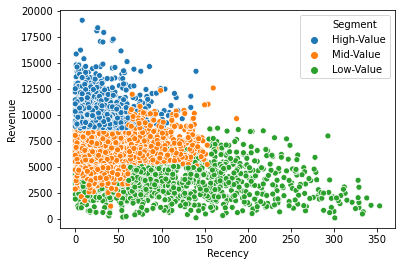

In [101]:
x=tx_user['Recency']
y=tx_user['Revenue']
sns.scatterplot(x,y,hue='Segment',data=tx_user)

In [104]:
tx_user['Segment'].value_counts()

Mid-Value     1425
Low-Value     1296
High-Value     698
Name: Segment, dtype: int64

In [119]:
df5 = pd.merge(df_main,tx_user,on='customer_id')

In [120]:
tx_user.columns

Index(['customer_id', 'Recency', 'RecencyCluster', 'Frequency',
       'FrequencyCluster', 'Revenue', 'RevenueCluster', 'OverallScore',
       'Segment'],
      dtype='object')

In [139]:
df5.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'Age', 'postcode', 'state', 'country',
       'property_valuation', 'transaction_year_month', 'Revenue_x',
       'MinPurchaseDate', 'MinPurchaseYearMonth', 'UserType', 'Recency',
       'RecencyCluster', 'Frequency', 'FrequencyCluster', 'Revenue_y',
       'RevenueCluster', 'OverallScore', 'Segment'],
      dtype='object')

In [136]:
high_val = df5[df5['Segment']=='High-Value']

In [140]:
Persona=high_val[['customer_id','gender','job_title','job_industry_category','wealth_segment','owns_car','tenure','Age','state','country','property_valuation']]

In [149]:
Personas = Persona.drop_duplicates('customer_id')

In [151]:
Personas.reset_index(drop=True)

,customer_id,gender,job_title,job_industry_category,wealth_segment,owns_car,tenure,Age,state,country,property_valuation
0,1229,Male,GIS Technical Architect,Manufacturing,Affluent Customer,Yes,1.0,20.0,NSW,Australia,11
1,51,Male,Computer Systems Analyst II,Retail,Mass Customer,No,18.0,61.0,QLD,Australia,5
2,2418,Female,Software Engineer III,Property,Mass Customer,Yes,13.0,50.0,VIC,Australia,5
3,2686,Male,Automation Specialist II,Financial Services,Affluent Customer,No,4.0,24.0,VIC,Australia,8
4,1762,Female,Research Assistant II,Health,Mass Customer,Yes,18.0,42.0,VIC,Australia,9
...,...,...,...,...,...,...,...,...,...,...,...
693,2023,Male,Associate Professor,Financial Services,High Net Worth,No,10.0,49.0,NSW,Australia,7
694,3118,Male,Occupational Therapist,Health,High Net Worth,No,9.0,27.0,QLD,Australia,8
695,1554,Male,Assistant Manager,Retail,Affluent Customer,No,3.0,26.0,NSW,Australia,8
696,829,Male,Environmental Tech,Financial Services,High Net Worth,Yes,2.0,19.0,VIC,Australia,8


In [152]:
Personas.to_excel('KPMG_HighVal.xlsx')

In [ ]:
df5.to_excel('KPMG_segment.xlsx')